In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("../datasets/healthcare-dataset-stroke-data.csv")
print(df.columns)


Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [ ]:

# Remove any extra spaces from column names
df.columns = df.columns.str.strip()


In [ ]:
# Show last 5 rows
print(df.tail())

# Show rows from index 5 to 17
print(df.iloc[5:18])


         id  gender   age  hypertension  heart_disease ever_married  \
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
5105        Private          Urban              83.75   NaN     never smoked   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  
5105       0  
5106       0  
5107       0  
5108       0  
5109       0  
  

In [ ]:
print(df.isnull().sum())



id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [ ]:
print("Total values in dataset:", df.size)



Total values in dataset: 61320


In [ ]:
# Count duplicate rows
print(df.duplicated().sum(), "duplicate rows found")

# Remove duplicate rows
df = df.drop_duplicates()
print(df.columns)

0 duplicate rows found
Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [ ]:
mean_bmi = df['bmi'].mean()
df['bmi'].fillna(mean_bmi, inplace=True)



/tmp/ipython-input-408267939.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(mean_bmi, inplace=True)


In [ ]:
# Statistical summary of numeric columns
df.describe()



,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
# Information about dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
row_mean = df.loc[9, numeric_cols].mean()
print("Mean of row at index 9:", row_mean)


Mean of row at index 9: 8664.681428571428


In [ ]:
# Summary using describe (same as point 7)
df.describe()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


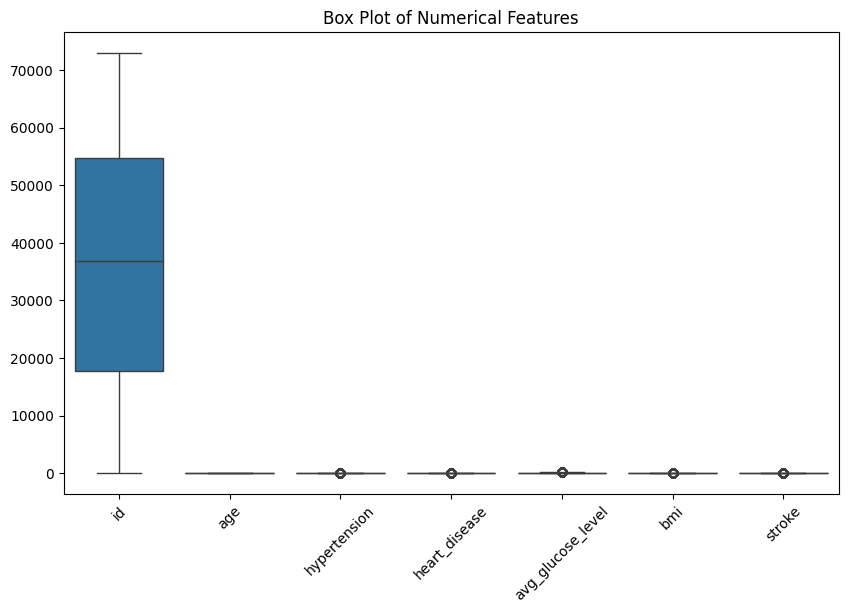

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for numerical features
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.title("Box Plot of Numerical Features")
plt.xticks(rotation=45)
plt.show()


In [ ]:
print(df.columns)



Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


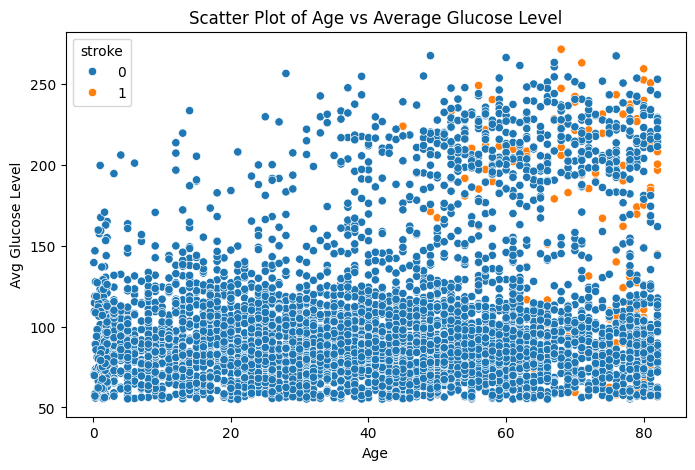

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='age', y='avg_glucose_level', hue='stroke', data=df)
plt.title("Scatter Plot of Age vs Average Glucose Level")
plt.xlabel("Age")
plt.ylabel("Avg Glucose Level")
plt.show()


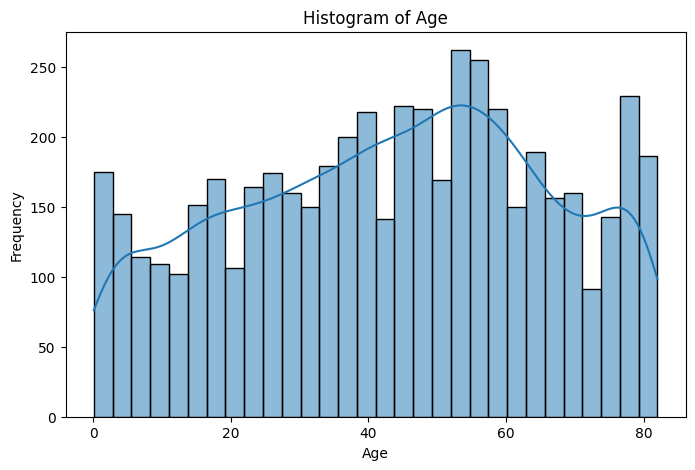

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


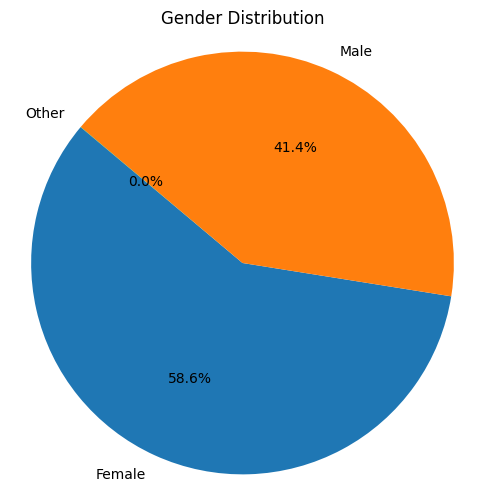

In [ ]:
gender_counts = df['gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Gender Distribution")
plt.axis('equal')
plt.show()


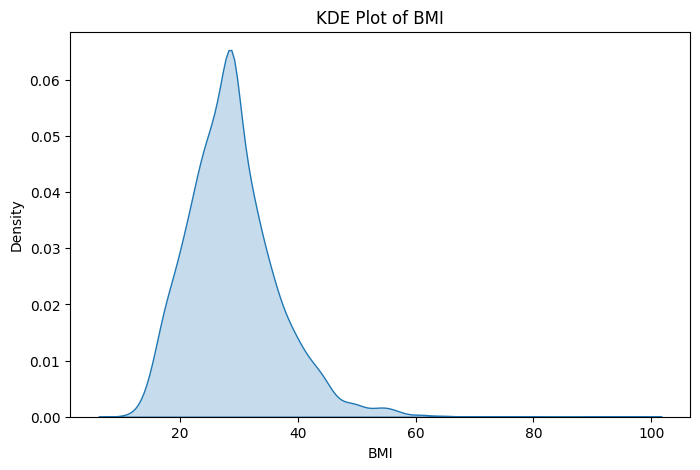

In [ ]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df['bmi'].dropna(), fill=True)
plt.title("KDE Plot of BMI")
plt.xlabel("BMI")
plt.ylabel("Density")
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the dataset
df_encoded = df.copy()

# List of categorical columns to encode
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Initialize label encoder
le = LabelEncoder()

# Encode each column
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))  # Convert NaNs to strings if any

# Display first few rows of encoded data
print(df_encoded.head())


      id  gender   age  hypertension  heart_disease  ever_married  work_type  \
0   9046       1  67.0             0              1             1          2   
1  51676       0  61.0             0              0             1          3   
2  31112       1  80.0             0              1             1          2   
3  60182       0  49.0             0              0             1          2   
4   1665       0  79.0             1              0             1          3   

   Residence_type  avg_glucose_level        bmi  smoking_status  stroke  
0               1             228.69  36.600000               1       1  
1               0             202.21  28.893237               2       1  
2               0             105.92  32.500000               2       1  
3               1             171.23  34.400000               3       1  
4               0             174.12  24.000000               2       1  


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('../datasets/healthcare-dataset-stroke-data.csv')

# Drop 'id' column (not useful for prediction)
df.drop('id', axis=1, inplace=True)

# Fill missing values in 'bmi' column with the mean
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

# Convert categorical columns to numeric (one-hot encoding)
df = pd.get_dummies(df, drop_first=True)

# Separate features and target
X = df.drop('stroke', axis=1)
y = df['stroke']


In [ ]:
from sklearn.model_selection import train_test_split #this will split the data into training and testing data and also help to standardise the values
from sklearn.preprocessing import StandardScaler

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Naive Bayes Classifier
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report

# KNN Report
print("=== KNN Classification Report ===")
print(classification_report(y_test, y_pred_knn, zero_division=0))

# Naive Bayes Report
print("=== Naive Bayes Classification Report ===")
print(classification_report(y_test, y_pred_nb, zero_division=0))


=== KNN Classification Report ===
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       960
           1       0.12      0.02      0.03        62

    accuracy                           0.93      1022
   macro avg       0.53      0.50      0.50      1022
weighted avg       0.89      0.93      0.91      1022

=== Naive Bayes Classification Report ===
              precision    recall  f1-score   support

           0       1.00      0.25      0.40       960
           1       0.08      1.00      0.15        62

    accuracy                           0.30      1022
   macro avg       0.54      0.63      0.28      1022
weighted avg       0.94      0.30      0.39      1022



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create comparison table
results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'KNN': [
        accuracy_score(y_test, y_pred_knn),
        precision_score(y_test, y_pred_knn, zero_division=0),
        recall_score(y_test, y_pred_knn, zero_division=0),
        f1_score(y_test, y_pred_knn, zero_division=0)
    ],
    'Naive Bayes': [
        accuracy_score(y_test, y_pred_nb),
        precision_score(y_test, y_pred_nb, zero_division=0),
        recall_score(y_test, y_pred_nb, zero_division=0),
        f1_score(y_test, y_pred_nb, zero_division=0)
    ]
})

print("\n=== Matrix Value Comparison Table ===")
print(results)




=== Matrix Value Comparison Table ===
      Metric       KNN  Naive Bayes
0   Accuracy  0.933464     0.298434
1  Precision  0.125000     0.079589
2     Recall  0.016129     1.000000
3   F1 Score  0.028571     0.147444


/tmp/ipython-input-1356967135.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['bmi'].fillna(data['bmi'].mean(), inplace=True)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565

Confusion Matrix:
 [[960   0]
 [ 62   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



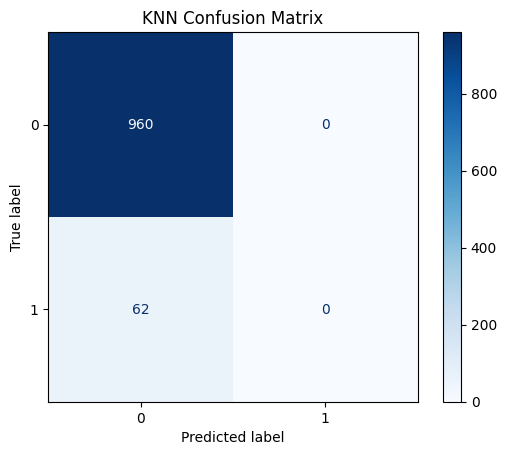

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv("../datasets/healthcare-dataset-stroke-data.csv")

# Drop unnecessary columns
data.drop(['id'], axis=1, inplace=True)

# Handle missing values
data['bmi'].fillna(data['bmi'].mean(), inplace=True)

# Encode categorical variables
data['gender'] = data['gender'].map({'Male': 1, 'Female': 0, 'Other': 2})
data['ever_married'] = data['ever_married'].map({'Yes': 1, 'No': 0})
data['work_type'] = data['work_type'].astype('category').cat.codes
data['Residence_type'] = data['Residence_type'].map({'Urban': 1, 'Rural': 0})
data['smoking_status'] = data['smoking_status'].astype('category').cat.codes

# Features and target
X = data.drop('stroke', axis=1)
y = data['stroke']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Optional: print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("KNN Confusion Matrix")
plt.show()


In [ ]:
# also do cv and stratified k fold

In [39]:
# 1. Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# 2. Load dataset
df = pd.read_csv("../datasets/healthcare-dataset-stroke-data.csv")

# 3. Data cleaning
df.drop('id', axis=1, inplace=True)  # remove ID column
df['bmi'].fillna(df['bmi'].mean(), inplace=True)  # fill missing BMI with mean

# 4. Encode categorical columns
label_enc = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_enc.fit_transform(df[col])

# 5. Features & target
X = df.drop('stroke', axis=1)
y = df['stroke']

# 6. Define K-Fold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# 7. Decision Tree with K-Fold
dt_model = DecisionTreeClassifier(random_state=42)
dt_scores = cross_val_score(dt_model, X, y, cv=kfold, scoring='accuracy')

print("Decision Tree Accuracy Scores:", dt_scores)
print("Decision Tree Mean Accuracy:", dt_scores.mean())

# 8. Random Forest with K-Fold
rf_model = RandomForestClassifier(random_state=42)
rf_scores = cross_val_score(rf_model, X, y, cv=kfold, scoring='accuracy')

print("\nRandom Forest Accuracy Scores:", rf_scores)
print("Random Forest Mean Accuracy:", rf_scores.mean())


/tmp/ipython-input-3052188102.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].mean(), inplace=True)  # fill missing BMI with mean


Decision Tree Accuracy Scores: [0.91193738 0.90900196 0.92074364 0.91682975 0.92759295]
Decision Tree Mean Accuracy: 0.9172211350293542

Random Forest Accuracy Scores: [0.93933464 0.94520548 0.95988258 0.94716243 0.95694716]
Random Forest Mean Accuracy: 0.949706457925636


/tmp/ipython-input-1116703516.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].mean(), inplace=True)


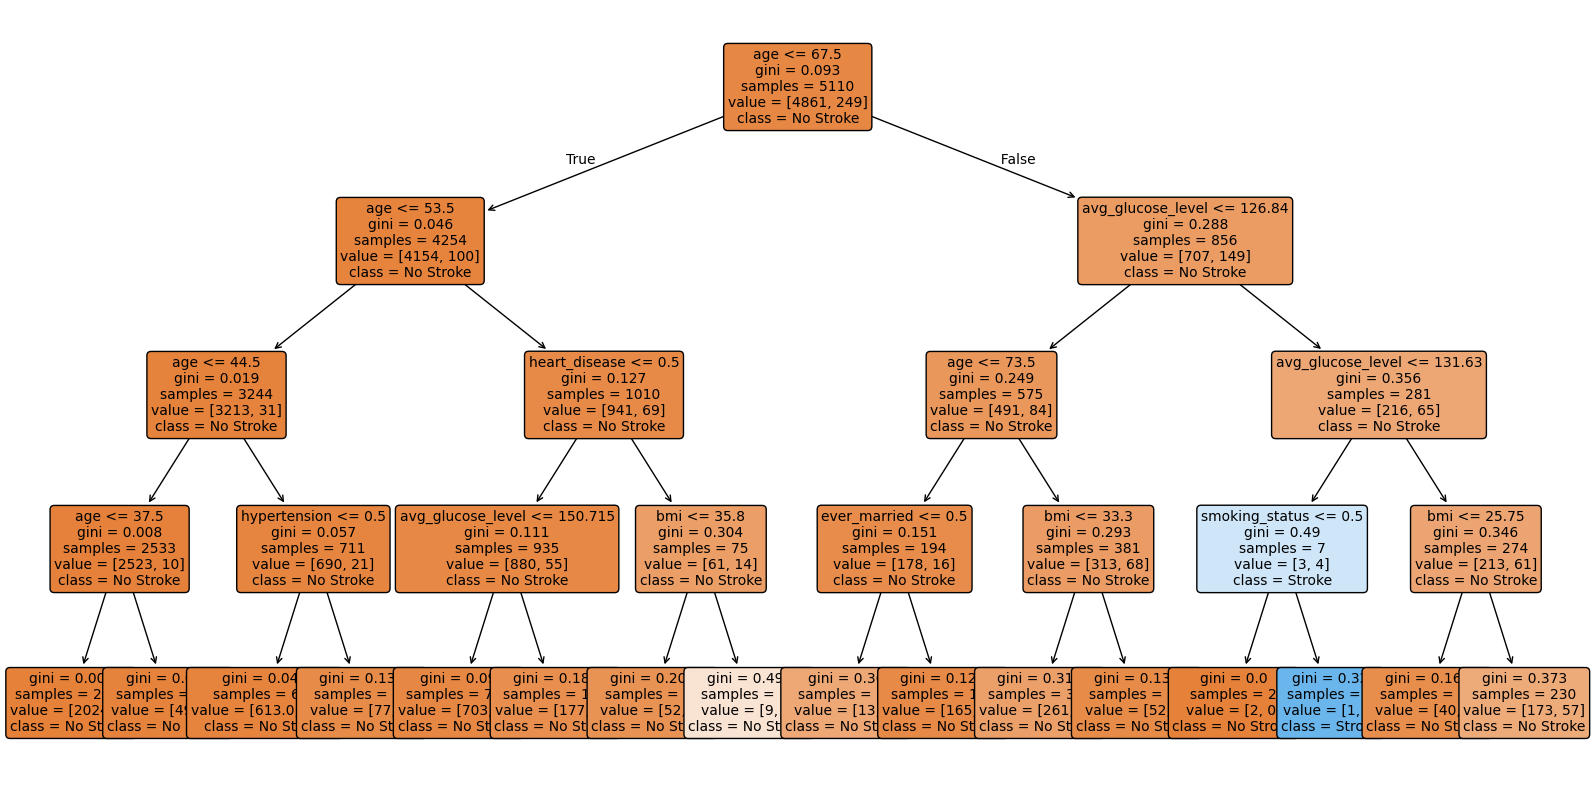

In [40]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# 1. Load dataset
df = pd.read_csv("../datasets/healthcare-dataset-stroke-data.csv")

# 2. Clean data
df.drop('id', axis=1, inplace=True)
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

# 3. Encode categorical variables
label_enc = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_enc.fit_transform(df[col])

# 4. Features and target
X = df.drop('stroke', axis=1)
y = df['stroke']

# 5. Train Decision Tree
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model.fit(X, y)

# 6. Plot Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model,
          feature_names=X.columns,
          class_names=['No Stroke', 'Stroke'],
          filled=True, rounded=True, fontsize=10)
plt.show()
